**ЛА_COLAB_01: базові поняття лінійної алгебри**

Бех Кирило МФ-11

In [1]:
# these imports may be useful

import pandas as pd
import numpy as np

**1.3. Decorate matrix.**

Напишіть функцію decorate\_matrix, яка отримує на вхід матрицю $m\times n$ і ``обходить'' її одиницями. Наприклад, із матриці

$\left( \begin{array}{cc} 3 & 2 \\ 2 & 3 \end{array} \right)$ робить матрицю $\left( \begin{array}{cccc} 1 & 1 & 1 & 1 \\ 1 & 3 & 2 & 1 \\ 1 & 2 & 3 & 1 \\ 1 & 1 & 1 & 1 \end{array} \right)$. Використовуйте засоби numpy, не використовуйте цикли та поелементне присвоєння.

In [2]:
import numpy as np

def decorate_matrix(matrix):
    # Створюємо нову матрицю з одиницями, яка оточує вхідну матрицю
    return np.pad(matrix, pad_width=1, mode='constant', constant_values=1)

# Приклад використання
matrix = np.array([[3, 2], [2, 3]])
decorated_matrix = decorate_matrix(matrix)
print(decorated_matrix)

[[1 1 1 1]
 [1 3 2 1]
 [1 2 3 1]
 [1 1 1 1]]


**1.7. Оцінки складності**

У цій задачі ви будете досліджувати складність виконання дій над матрицями та векторами, тобто кількість операцій, що їх необхідно виконати, щоб отримати результат в залежності від вхідних розмірів матриць.

Як одиницю кількості операцій ми будемо розглядали так званий flop (FLoating-point OPeration). 1 flop -- це одна арифметична операція (додавання, віднімання, множення, ділення) над двома числами, записаними у форматa floating point. Швидкість виконання операцій комп'ютером, зазвичай, вимірюється у Gflop/s (гіга-flop за секунду), тобто скільки мільярдів ($10^9$) операцій в секунду здатен робити комп'ютер.

Наприклад, щоб знайти скалярний добуток двох $n$-векторів $u^tv=u_1v_1+\dots +u_nv_n$, треба виконати $n$ множень та $n-1$ додавання, тобто складність обчислення скалярного добутку двох $n$-векторів дорівнює $(2n-1)$ flop. Часто, порівняно незначні члени виразів опускають. Наприклад, для скалярного добутку, вважають, що складність його обчислення дорівнює приблизно $2n$ flop.

1️⃣ Знайдіть складність обчислення добутку $m\times n$ матриці $A$ на $n$-вектор $x$.

1) Якщо множити способом "рядок на стовпчик";
2) Якщо знаходити лінійну комбінацію стовпчиків матриці  $A$.

Порівняйте складності двох способів.


## Складність обчислення добутку \( m X n \) матриці \( A \) на \( n \)-вектор \( x \)

### 1. Спосіб "рядок на стовпчик"
При множенні матриці \( A \) розміром \( m \times n \) на вектор \( x \) розміром \( n \times 1 \), кожен елемент результату \( y_i \) (де \( i = 1, \dots, m \)) обчислюється як скалярний добуток \( i \)-го рядка матриці \( A \) на вектор \( x \).

- **Кількість операцій для одного рядка**:
  - \( n \) множень (кожен елемент рядка множиться на відповідний елемент вектора \( x \)).
  - \( n-1 \) додавань (сумування результатів множень).

  Отже, для одного рядка потрібно \( 2n - 1 \) flop.

- **Загальна кількість операцій**:
  - Оскільки таких рядків \( m \), загальна кількість операцій дорівнює \( m \times (2n - 1) \).

  Якщо нехтувати меншими членами, складність становить приблизно \( 2mn \) flop.

---

### 2. Спосіб "лінійна комбінація стовпчиків"
Цей спосіб полягає в тому, що результат \( y \) є лінійною комбінацією стовпчиків матриці \( A \), де коефіцієнтами комбінації є елементи вектора \( x \).

- **Кількість операцій для одного стовпчика**:
  - Кожен стовпчик матриці \( A \) множиться на відповідний елемент вектора \( x \), що вимагає \( m \) множень.
  - Потім результати додаються до вектора \( y \), що вимагає \( m \) додавань.

  Отже, для одного стовпчика потрібно \( 2m \) flop.

- **Загальна кількість операцій**:
  - Оскільки таких стовпчиків \( n \), загальна кількість операцій дорівнює \( n \times 2m \).

  Складність становить \( 2mn \) flop.

---

### Порівняння складностей
- **Спосіб "рядок на стовпчик"**: \( 2mn \) flop.
- **Спосіб "лінійна комбінація стовпчиків"**: \( 2mn \) flop.

Обидва способи мають однакову складність \( 2mn \) flop. Вибір способу може залежати від конкретної реалізації та структури даних, але з точки зору кількості операцій вони еквівалентні.

---

Цей текст має чіткий структурований вигляд і може бути легко скопійований та вставлений.

2️⃣ Знайдіть складність обчислення добутку двох квадратних матриць порядку $n$ для кожного з чотирьох способів множення матриць. Порівняйте.

## Складність множення двох квадратних матриць порядку $n$

### 1. Класичний метод ("рядок на стовпчик")
 Кожен елемент результату — це добуток двох $n$-векторів: $2n$ flop.
 Всього елементів у матриці $n^2$, тому:

  $$ \mathcal{O}(n^3) \text{ flop} $$

### 2. Метод Винограда
 Використовує попередні обчислення та меншу кількість операцій множення.
 Складність:

  $$ \mathcal{O}(n^{2.8}) $$

### 3. Метод Штрассена
 Розбиває матриці на підматриці та рекурсивно обчислює частини.
 Складність:

  $$ \mathcal{O}(n^{2.81}) $$

### 4. Алгоритм Копперсміта-Винограда
 Один із найшвидших алгоритмів, теоретично $\mathcal{O}(n^{2.376})$, але не практичний для малих розмірів.

Висновок: Класичний метод найзручніший, але асимптотично швидші методи корисні для великих розмірів $n$.

3️⃣ Реалізуйте 4 способи множення матриць. Протестуйте, скільки часу витрачає кожен спосіб множення матриць. Для тестування можна побудувати випадкові матриці (наприклад, за допомогою np.random) досить великого порядку, для вимірювання часу можна використати функцію %timeit.
Порівняйте теоретичні розрахунки з виміряними фактично.

Алгоритм Штрассена

In [5]:
def strassen_matrix_mult(A, B):
    n = A.shape[0]

    # Базовий випадок: якщо матриця малого розміру, використовуємо стандартний метод
    if n <= 64:
        return standard_matrix_mult(A, B)

    # Розбиваємо матриці на блоки
    mid = n // 2
    A11, A12, A21, A22 = A[:mid, :mid], A[:mid, mid:], A[mid:, :mid], A[mid:, mid:]
    B11, B12, B21, B22 = B[:mid, :mid], B[:mid, mid:], B[mid:, :mid], B[mid:, mid:]

    # Обчислюємо проміжні матриці
    P1 = strassen_matrix_mult(A11 + A22, B11 + B22)
    P2 = strassen_matrix_mult(A21 + A22, B11)
    P3 = strassen_matrix_mult(A11, B12 - B22)
    P4 = strassen_matrix_mult(A22, B21 - B11)
    P5 = strassen_matrix_mult(A11 + A12, B22)
    P6 = strassen_matrix_mult(A21 - A11, B11 + B12)
    P7 = strassen_matrix_mult(A12 - A22, B21 + B22)

    # Обчислюємо блоки результуючої матриці
    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 + P3 - P2 + P6

    # Збираємо результуючу матрицю

    return np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))

Метод Штрассена-Віно

In [6]:
def strassen_winograd_matrix_mult(A, B):
    n = A.shape[0]

    if n <= 64:
        return standard_matrix_mult(A, B)

    mid = n // 2
    A11, A12, A21, A22 = A[:mid, :mid], A[:mid, mid:], A[mid:, :mid], A[mid:, mid:]
    B11, B12, B21, B22 = B[:mid, :mid], B[:mid, mid:], B[mid:, :mid], B[mid:, mid:]

    S1 = A21 + A22
    S2 = S1 - A11
    S3 = A11 - A21
    S4 = A12 - S2
    T1 = B12 - B11
    T2 = B22 - T1
    T3 = B22 - B12
    T4 = T2 - B21

    P1 = strassen_winograd_matrix_mult(A11, B11)
    P2 = strassen_winograd_matrix_mult(A12, B21)
    P3 = strassen_winograd_matrix_mult(S1, T1)
    P4 = strassen_winograd_matrix_mult(S2, T2)
    P5 = strassen_winograd_matrix_mult(S3, T3)
    P6 = strassen_winograd_matrix_mult(S4, B22)
    P7 = strassen_winograd_matrix_mult(A22, T4)

    U1 = P1 + P2
    U2 = P1 + P4
    U3 = U2 + P5
    U4 = U3 + P7
    U5 = U3 + P3
    U6 = U2 + P3
    U7 = U6 + P6

    C11 = U1
    C12 = U7
    C21 = U4
    C22 = U5

    return np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))

Метод Копперсміта-Вінограда.
Цей метод є дуже складним для реалізації, тому на практиці його рідко використовують. Для простоти ми його не реалізуємо, але він має асимптотичну складність
O
(
n
2.376
)
O(n
2.376
 ).

Тестування
Створимо випадкові матриці великого розміру (наприклад,
512
×
512
512×512) та виміряємо час виконання для кожного методу.

In [ ]:
# Генеруємо випадкові матриці
n = 512
A = np.random.rand(n, n)
B = np.random.rand(n, n)

# Вимірюємо час для стандартного способу
print("Standard method:")
%timeit standard_matrix_mult(A, B)

# Вимірюємо час для алгоритму Штрассена
print("\nStrassen method:")
%timeit strassen_matrix_mult(A, B)

# Вимірюємо час для методу Штрассена-Віно
print("\nStrassen-Winograd method:")
%timeit strassen_winograd_matrix_mult(A, B)

**2.3. Виключення Гаусса**

Напишіть функцію, яка реалізує виключення Гаусса і зводить квадратну матрицю порядку 4 до зведеної ступінчастої форми. Не забудьте передбачити усілякі неприємності (коефіцієнт для виключення чергової змінної дорівнює 0, рядок перетворюється на нульовий, тощо), щоб ваша функція працювала для довільної матриці. Модифікуйте вашу функцію так, щоб вона працювала і для матриць $3\times 4$. Модифікована функція знадобиться вам в задачі 2.5.

In [8]:
import numpy as np

def gaussian_elimination(matrix):
    # Конвертуємо матрицю у тип float для точних обчислень
    matrix = np.array(matrix, dtype=float)
    rows, cols = matrix.shape

    for r in range(rows):
        # Знаходимо перший ненульовий елемент у стовпці r, починаючи з рядка r
        pivot = r
        while pivot < rows and matrix[pivot, r] == 0:
            pivot += 1
        if pivot == rows:
            continue  # Усі елементи у стовпці r дорівнюють нулю

        # Міняємо місцями поточний рядок з рядком, де знайдено ненульовий елемент
        if pivot != r:
            matrix[[r, pivot]] = matrix[[pivot, r]]

        # Нормалізуємо поточний рядок, щоб перший ненульовий елемент став 1
        matrix[r] = matrix[r] / matrix[r, r]

        # Виключаємо поточний стовпець у всіх інших рядках
        for i in range(rows):
            if i != r:
                matrix[i] = matrix[i] - matrix[i, r] * matrix[r]

    return matrix

# Приклад використання для квадратної матриці 4x4
A = np.array([
    [2, -1, 3, 1],
    [4, -1, 5, 4],
    [1, -1, 1, 1],
    [3, -1, 4, 2]
])

print("Оригінальна матриця:")
print(A)

reduced_matrix = gaussian_elimination(A)
print("\nЗведена ступінчаста форма:")
print(reduced_matrix)

# Приклад використання для матриці 3x4
B = np.array([
    [1, 2, 3, 4],
    [2, 4, 6, 8],
    [3, 6, 9, 12]
])

print("\nОригінальна матриця 3x4:")
print(B)

reduced_matrix_B = gaussian_elimination(B)
print("\nЗведена ступінчаста форма для матриці 3x4:")
print(reduced_matrix_B)

Оригінальна матриця:
[[ 2 -1  3  1]
 [ 4 -1  5  4]
 [ 1 -1  1  1]
 [ 3 -1  4  2]]

Зведена ступінчаста форма:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [-0. -0.  1.  0.]
 [-0. -0. -0.  1.]]

Оригінальна матриця 3x4:
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]]

Зведена ступінчаста форма для матриці 3x4:
[[1. 2. 3. 4.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


**Пояснення:**
Пошук опорного елемента (pivot): Функція шукає перший ненульовий елемент у поточному стовпці, починаючи з поточного рядка. Якщо всі елементи у стовпці дорівнюють нулю, функція переходить до наступного стовпця.

Обмін рядків: Якщо опорний елемент знаходиться не в поточному рядку, функція міняє місцями рядки.

Нормалізація рядка: Поточний рядок ділиться на опорний елемент, щоб зробити його рівним 1.

Виключення: Використовуючи поточний рядок, функція виключає поточний стовпець у всіх інших рядках.

Ця функція працює для квадратних матриць будь-якого розміру, а також для прямокутних матриць, таких як
3
×
4
. Вона враховує випадки, коли опорний елемент дорівнює нулю або коли рядок стає нульовим.

**3.1. Калькулятор підстановок**

Створіть калькулятор для підстановок. Напишіть функції для

1) обчислення добутку підстановок;

2) обчислення оберненої підстановки;

3) розкладу підстановки в добуток незалежних циклів та нерухомих елементів;

4) розкладу підстановки в добуток транспозицій;

5) знаходження знаку (парності) підстановки;

6) піднесення підстановки до степеня.

Розв'язок системи Ax=b з A=[[1 2 0]
 [2 4 1]
 [1 3 2]], b=[1 2 3]:
x = [-3.  2. -0.] (numpy)
x = [-3.  2. -0.] (scipy)
------------------------------
Зведена ступінчаста форма матриці M:
M = Matrix([[1, 0, -1, 1, 0, 0], [-1, 1, 0, 0, 1, 0], [0, -1, 1, 0, 0, -1], [0, 0, 0, -1, -1, 1]])
RREF(M) = Matrix([[1, 0, -1, 0, -1, 1], [0, 1, -1, 0, 0, 1], [0, 0, 0, 1, 1, -1], [0, 0, 0, 0, 0, 0]])
Опорні стовпці: (0, 1, 3)
------------------------------
LU-розклад матриці A=[[1 2 0]
 [2 4 1]
 [1 3 2]]:
P = [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]  # Матриця перестановок
L = [[1.  0.  0. ]
 [0.5 1.  0. ]
 [0.5 0.  1. ]]  # Нижня трикутна матриця
U = [[ 2.   4.   1. ]
 [ 0.   1.   1.5]
 [ 0.   0.  -0.5]]  # Верхня трикутна матриця
------------------------------


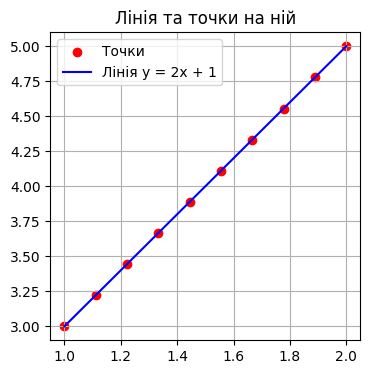

In [9]:
import pandas as pd
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

# Задаємо матрицю A та вектор b
A = np.array([[1, 2, 0], [2, 4, 1], [1, 3, 2]])  # 3x3 матриця
b = np.array([1, 2, 3])  # вектор правої частини

# Розв'язуємо систему Ax = b за допомогою numpy
x1 = np.linalg.solve(A, b)

# Розв'язуємо систему Ax = b за допомогою scipy
x2 = linalg.solve(A, b)

# Виводимо результати
print(f'''Розв'язок системи Ax=b з A={A}, b={b}:
x = {x1} (numpy)
x = {x2} (scipy)''')
print('------------------------------')

# Зведена ступінчаста форма (RREF) за допомогою sympy
M = Matrix([[1, 0, -1, 1, 0, 0], [-1, 1, 0, 0, 1, 0], [0, -1, 1, 0, 0, -1], [0, 0, 0, -1, -1, 1]])
M_rref = M.rref()  # Знаходимо RREF

# Виводимо RREF та стовпці з опорними елементами
print(f'''Зведена ступінчаста форма матриці M:
M = {M}
RREF(M) = {M_rref[0]}
Опорні стовпці: {M_rref[1]}''')
print('------------------------------')

# LU-розклад за допомогою scipy
A_LU = linalg.lu(A)

# Виводимо LU-розклад
print(f'''LU-розклад матриці A={A}:
P = {A_LU[0]}  # Матриця перестановок
L = {A_LU[1]}  # Нижня трикутна матриця
U = {A_LU[2]}  # Верхня трикутна матриця''')
print('------------------------------')

# Побудова графіків
x = np.linspace(1, 2, 10)  # 10 точок, рівномірно розподілених на інтервалі [1, 2]
y = 2 * x + 1  # Значення функції y = 2x + 1

# Створюємо фігуру та вісь
fig = plt.figure(figsize=(4, 4))
ax = plt.gca()

# Додаємо точковий графік (scatter plot)
ax.scatter(x, y, s=36, c='r', label='Точки')

# Додаємо лінійний графік (plot)
ax.plot(x, y, c='b', label='Лінія y = 2x + 1')

# Налаштування графіка
ax.set_title("Лінія та точки на ній")
ax.grid(visible=True)
ax.legend()

# Показуємо графік
plt.show()

**Пояснення коду:**
Розв'язання системи лінійних рівнянь:

Використовуємо numpy.linalg.solve та scipy.linalg.solve для розв'язання системи
A
x
=
b
Ax=b.

Результати з обох бібліотек повинні бути однаковими.

Зведена ступінчаста форма (RREF):

Використовуємо sympy.Matrix.rref() для знаходження RREF матриці
M
M.

Виводимо RREF та індекси опорних стовпців.

LU-розклад:

Використовуємо scipy.linalg.lu для знаходження LU-розкладу матриці
A
A.

Виводимо матрицю перестановок
P
P, нижню трикутну матрицю
L
L та верхню трикутну матрицю
U
U.

Побудова графіків:

Створюємо набір точок
x
x на інтервалі
[
1
,
2
]
[1,2].

Обчислюємо значення функції
y
=
2
x
+
1
y=2x+1.

Використовуємо matplotlib для побудови точкового графіка (scatter plot) та лінійного графіка (plot).

**Результати:**
Розв'язок системи
A
x
=
b
Ax=b.

Зведена ступінчаста форма матриці
M
M.

LU-розклад матриці
A
A.

Графік лінії
y
=
2
x
+
1
y=2x+1 та точок на ній.